***Paradise News:***

https://www.paradisepost.com/tag/camp-fire/ 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp 
import seaborn as sns
%matplotlib inline
import lxml.html as lx
import requests
import requests_cache
import nltk
import nltk.corpus
import time
import re
from nltk.corpus import wordnet
from wordcloud import WordCloud, STOPWORDS
requests_cache.install_cache("my_cache_paradise")

In [2]:
def total_articles(url): 
    response = requests.get(url)
    time.sleep(1)
    response.raise_for_status()
    html = lx.fromstring(response.text)
    html.make_links_absolute(url)
    dup_links = html.xpath("//h4/a/@href")
    links = list(set(dup_links))
    return links

In [3]:
#total_articles("https://www.paradisepost.com/tag/camp-fire/") ##10 most current articles 

In [4]:
#accounting for multiple pages
def mult_pages(url, page): 
    """takes in url as a string and number of pages wanting to read through (each page will give 10 articles)"""
    empty = []
    for i in list(range(0,page)):
        current_iterate = total_articles("https://www.paradisepost.com/tag/camp-fire/" + ("page" + str(i)))
        empty = empty + current_iterate
    return empty 

In [5]:
mult_pages("https://www.paradisepost.com/tag/camp-fire/", 1) ##10 most current articles 

['https://www.paradisepost.com/2019/03/02/after-the-flames-a-call-for-help-a-journey-to-recovery/',
 'https://www.paradisepost.com/2019/02/27/town-says-burn-permits-available-for-purchase-starting-tomorrow/',
 'https://www.paradisepost.com/2019/03/01/lime-saddle-campground-in-oroville-opened-exclusively-to-camp-fire-survivors/',
 'https://www.paradisepost.com/2019/02/28/local-4-h-members-help-paradise-youth-rebuild/',
 'https://www.paradisepost.com/2019/03/01/county-accepting-applications-for-alternative-debris-removal-program-until-march-15/',
 'https://www.paradisepost.com/2019/02/27/pge-delayed-repairs-for-years-on-transmission-line-linked-to-lethal-camp-fire/',
 'https://www.paradisepost.com/2019/02/27/symphony-orchestra-will-host-concerts-honoring-first-responders-teachers/',
 'https://www.paradisepost.com/2019/03/01/help-needed-to-learn-more-about-three-victims/',
 'https://www.paradisepost.com/2019/02/26/north-valley-community-foundation-releases-100000-more-in-grants-for-camp-f

In [6]:
#take out related articles. receive the text 
def single_article(url): 
    response = requests.get(url)
    time.sleep(1)
    html = lx.fromstring(response.text)
    
    #title 
    title = html.xpath("//h1[contains(@class, 'entry-title')]/span/text()")
    title = ' '.join(title)
    title = title.strip("\n")
    title = title.strip("\t")
   
    #text
    text = html.xpath("//div[contains(@class, 'article-body')]/div[contains(@class, 'body-copy')]/p/text()[not(descendant::em)] | ///div[contains(@class, 'article-body')]/div[contains(@class, 'body-copy')]//ul/li/text()")
    text = ' '.join(text)
    text = text.replace("\n", '')
    text = text.replace("\t", '')
    
    #dates
    dates = html.xpath("///div[contains(@class, 'time')]//time/@datetime")[0]
    #first date is published, second date is updated 
    
    return {"url": url, "text": text, "title": title, "dates": dates}

In [7]:
single_article("https://www.paradisepost.com/2019/03/02/after-the-flames-a-call-for-help-a-journey-to-recovery/")

{'url': 'https://www.paradisepost.com/2019/03/02/after-the-flames-a-call-for-help-a-journey-to-recovery/',
 'text': 'The morning of the Camp Fire, former Paradise resident Ashley Joyner was at home, watching over seven children ranging in age from 17 to just one year old. Two of the children were her own and five belonged to her friend, who she regularly helped by babysitting. “That morning, I went and dropped my kids off at the (school) bus stop. There was no sign of a fire,” Joyner said. “Finally the bus showed up, and not even 15-20 minutes later, I’m getting phone calls from the school, telling me I got to go pick up the kids.” Joyner said as soon as she stepped outside, “it looked like a volcano had erupted.” What happened next was similar to so many other stories from that terrible day, but Joyner’s story was — at least partially — captured by her emotional 911 call that morning. https://www.chicoer.com/wp-content/uploads/2019/02/11-08-18-08.35.57-Phones-02-TEL-POS-2_Redacted.wav

In [8]:
def all_articles(url, page): 
    listing_numb = []
    all_pages = mult_pages(url, page)
    for i in list(range(0, len(all_pages))):
        listing_numb = listing_numb + [single_article(all_pages[i])]
    return pd.DataFrame(listing_numb)

In [9]:
one_month = all_articles("https://www.paradisepost.com/tag/camp-fire/", 8)
#one_month #camp fire articles in the past month for paradise website 

##takes roughly 2 minutes

In [10]:
one_month["dates"] = pd.to_datetime(one_month["dates"])
date_sort = one_month.sort_values(by = "dates")
#date_sort #sorted by date
date_sort.head()

,dates,text,title,url
78,2019-02-04 14:04:29,PARADISE — Emotions and tempers ran high Monda...,No RVs or temporary housing on property until ...,https://www.paradisepost.com/2019/02/04/no-rvs...
74,2019-02-05 15:20:23,The Paradise Unified School District is going ...,PUSD to ask for requests for proposals on tree...,https://www.paradisepost.com/2019/02/05/pusd-t...
72,2019-02-05 15:22:37,Theatre on the Ridge is reopening on Feb. ...,"Theatre on the Ridge reopens, Radioland show r...",https://www.paradisepost.com/2019/02/05/theatr...
79,2019-02-05 15:45:25,Since the great (not in a good way) California...,Out with the Dogs: Three in a travel trailer,https://www.paradisepost.com/2019/02/05/out-wi...
75,2019-02-05 16:00:13,A decade or so ago I came across James Howard ...,Resilience during the long emergency,https://www.paradisepost.com/2019/02/05/resili...


In [11]:
date_sort.to_pickle("paradise_articles.txt")

In [12]:
nltk.download("gutenberg")
nltk.download("punkt")
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package gutenberg to /Users/Troy/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Troy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/Troy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Troy/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/Troy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
def all_text(dataframe):
    """takes in dataframe and outputs all text columns into one string"""
    init_frame = ""
    for i in list(range(0,len(dataframe))):
        init_frame = init_frame + dataframe["text"][i]
    return init_frame

In [14]:
def wordnet_pos(tag):
    """Map a Brown POS tag to a WordNet POS tag."""
    
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN)

In [15]:
def token_plot(dataframe):
    """takes dataframe and desired subset (should be a string). outputs tokenized plot of text"""
    #tokenize
    corpus = all_text(dataframe)
    biz_token = nltk.word_tokenize(corpus)
    #resetting index to make sure all_text works 

    #lower case
    biz_token[:10]
    lower = [w.lower() for w in biz_token]
    lower[:10]

    #lemmatization
    lemmatizer = nltk.WordNetLemmatizer()
    tags = nltk.pos_tag(lower)
    lemm = [lemmatizer.lemmatize(w, wordnet_pos(t)) for (w, t) in tags]
    lemm

    #stopwords
    stopwords = nltk.corpus.stopwords.words("english") + ["pg", "e", "would", "make", "also", "could", "get", "go", "come", "time", "day", "know", "take", "first", "include"]
    full = [w for w in lemm if w not in stopwords]
    
    #plotting
    fq = nltk.FreqDist(w for w in full if w.isalnum())
    return fq.plot(20, title = "Top 25 Word Frequencies: Local", cumulative = False)

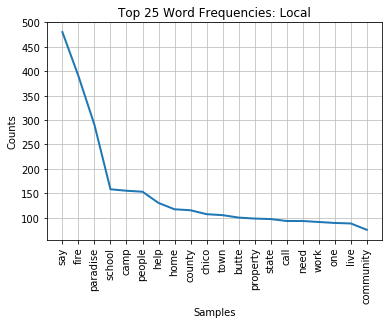

In [16]:
token_plot(date_sort)

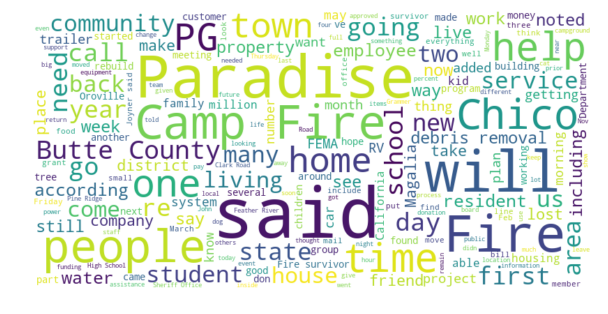

In [17]:
plt.rcParams["figure.figsize"] = [10, 8]
doc = ' '.join(date_sort['text'].tolist())
wordcloud = WordCloud(width = 800,
                     height = 400,
                     max_font_size = 100,
                     background_color = "white").generate(doc)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [18]:
###Sample of 50 
#paradise_sample = date_sort.sample(n = 50)

#full
paradise_sample = date_sort

#reset index
paradise_sample = paradise_sample.reset_index()

#source column (local)
paradise_sample['source'] = "Local"

#remove unneccessary columns 
paradise_sample = paradise_sample.drop(["dates", "url", "index"], axis = 1)
paradise_sample.head()

,text,title,source
0,PARADISE — Emotions and tempers ran high Monda...,No RVs or temporary housing on property until ...,Local
1,The Paradise Unified School District is going ...,PUSD to ask for requests for proposals on tree...,Local
2,Theatre on the Ridge is reopening on Feb. ...,"Theatre on the Ridge reopens, Radioland show r...",Local
3,Since the great (not in a good way) California...,Out with the Dogs: Three in a travel trailer,Local
4,A decade or so ago I came across James Howard ...,Resilience during the long emergency,Local


In [19]:
#paradise_sample.to_pickle("paradise_merge.txt")
##saving paradise data frame to pickle file 